GROUP 12
MEMBERS


# 1.Business Understanding

The goal is to build a recommendation system for a movie platform that suggests the top 5 movies to users based on their previous ratings. This system will use collaborative filtering to find similar user preferences and movie ratings, making personalized recommendations. We'll also explore combining this with content-based filtering to handle new users and movies. We'll measure the system's accuracy using RMSE and MAE to ensure it gives reliable movie suggestions.

# 2.Data Understanding

# a.Dataset Source and Size:

The dataset originates from MovieLens, provided by the GroupLens research lab at the University of Minnesota.

It includes a subset of ratings data, potentially from the "small" dataset version containing 100,000 ratings.

# b.Key Features:

movieId: Unique identifier for each movie in the dataset.

imdbId: IMDb identifier for each movie.

tmdbId: The Movie Database (TMDb) identifier for each movie.

userId_x: Identifier for users who have rated movies.

rating: Rating given by a user to a movie (typically on a scale).

timestamp_x: Timestamp when a user rated a movie.

title: Title of the movie.

genres: Genres associated with each movie.

userId_y: Identifier for users who have tagged movies.

tag: Tags assigned by users to movies.

timestamp_y: Timestamp when a user tagged a movie.





# 3. DATA PREPARATION AND CLEANING

import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('max_columns',20)
!pip3 install scikit-surprise
import surprise
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('max_columns',20)
#!pip3 install scikit-surprise
#import surprise
#from surprise import Dataset, Reader, SVD, accuracy
#from surprise.model_selection import train_test_split as surprise_train_test_split


load data

links = pd.read_csv(r'/content/links.csv')
ratings = pd.read_csv(r'/content/ratings.csv')
movies = pd.read_csv(r'/content/movies.csv')
tags = pd.read_csv(r'/content/tags.csv')

In [2]:
links = pd.read_csv(r'C:\Users\DANIEL\Desktop\MORINGA PHASE 4\PHASE 4 GROUP PROJECT\ml-latest-small\links.csv')
ratings = pd.read_csv(r'C:\Users\DANIEL\Desktop\MORINGA PHASE 4\PHASE 4 GROUP PROJECT\ml-latest-small\ratings.csv')
movies = pd.read_csv(r'C:\Users\DANIEL\Desktop\MORINGA PHASE 4\PHASE 4 GROUP PROJECT\ml-latest-small\movies.csv')
tags = pd.read_csv(r'C:\Users\DANIEL\Desktop\MORINGA PHASE 4\PHASE 4 GROUP PROJECT\ml-latest-small\tags.csv')

merge datasets on 'movieId' column

In [3]:
data1 = pd.merge(links, ratings, on='movieId', how="outer")
data2 = pd.merge(movies, tags, on='movieId',how="outer")
data  = pd.merge(data1, data2, on='movieId',how="outer")

explore data and its shape

In [4]:
data

,movieId,imdbId,tmdbId,userId_x,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y
0,1,114709,862.0,1.0,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
1,1,114709,862.0,1.0,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09
2,1,114709,862.0,1.0,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1.525286e+09
3,1,114709,862.0,5.0,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
4,1,114709,862.0,5.0,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09
...,...,...,...,...,...,...,...,...,...,...,...
285778,193581,5476944,432131.0,184.0,4.0,1.537109e+09,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,NaN,NaN,NaN
285779,193583,5914996,445030.0,184.0,3.5,1.537110e+09,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,NaN,NaN,NaN
285780,193585,6397426,479308.0,184.0,3.5,1.537110e+09,Flint (2017),Drama,NaN,NaN,NaN
285781,193587,8391976,483455.0,184.0,3.5,1.537110e+09,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,NaN,NaN,NaN


the data has 285,783 rows and 11 columns, the column names are below

In [5]:
data.columns

Index(['movieId', 'imdbId', 'tmdbId', 'userId_x', 'rating', 'timestamp_x',
       'title', 'genres', 'userId_y', 'tag', 'timestamp_y'],
      dtype='object')

In [6]:
data.describe()

,movieId,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,timestamp_y
count,285783.000000,2.857830e+05,285770.000000,285762.000000,285762.000000,2.857620e+05,233234.000000,2.332340e+05
mean,14927.663741,2.956050e+05,12797.315320,313.894279,3.841270,1.214707e+09,470.681354,1.384754e+09
std,31402.673519,5.150156e+05,43479.255523,179.451387,1.020798,2.233730e+08,153.324249,1.534705e+08
min,1.000000,4.170000e+02,2.000000,1.000000,0.500000,8.281246e+08,2.000000,1.137179e+09
25%,296.000000,1.098300e+05,489.000000,160.000000,3.000000,1.019133e+09,424.000000,1.242494e+09
50%,1721.000000,1.125730e+05,680.000000,314.000000,4.000000,1.211377e+09,477.000000,1.457901e+09
75%,5673.000000,2.415270e+05,8963.000000,465.000000,4.500000,1.445346e+09,599.000000,1.498457e+09
max,193609.000000,8.391976e+06,525662.000000,610.000000,5.000000,1.537799e+09,610.000000,1.537099e+09


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285783 entries, 0 to 285782
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      285783 non-null  int64  
 1   imdbId       285783 non-null  int64  
 2   tmdbId       285770 non-null  float64
 3   userId_x     285762 non-null  float64
 4   rating       285762 non-null  float64
 5   timestamp_x  285762 non-null  float64
 6   title        285783 non-null  object 
 7   genres       285783 non-null  object 
 8   userId_y     233234 non-null  float64
 9   tag          233234 non-null  object 
 10  timestamp_y  233234 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 26.2+ MB


OBSERVATIONS

#### Handle missing values

In [8]:
data.isnull().sum()

movieId            0
imdbId             0
tmdbId            13
userId_x          21
rating            21
timestamp_x       21
title              0
genres             0
userId_y       52549
tag            52549
timestamp_y    52549
dtype: int64

for columns in tmdbId, userId_x, rating, and timestamp_x will be filled in using imputer

In [9]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
missing_cols = ['userId_x', 'rating', 'timestamp_x']
data[missing_cols] = imputer.fit_transform(data[missing_cols])

#the above is used for continous data
#as 'tmdbId' is a identifier var mode shall be used

data['tmdbId'].fillna(data['tmdbId'].mode()[0], inplace=True)


In [10]:
data.isnull().sum()

movieId            0
imdbId             0
tmdbId             0
userId_x           0
rating             0
timestamp_x        0
title              0
genres             0
userId_y       52549
tag            52549
timestamp_y    52549
dtype: int64

In [11]:
# Fill missing values in tag column with a placeholder as we cant predict
#which tag will be associated, using measures of tendency may skew recommnedation
#because category and attached to another var 'movieId'
data['tag'].fillna(data['tag'].mode()[0], inplace=True)
data['userId_y'].fillna(method='ffill', inplace=True)
data['timestamp_y'].fillna(method='ffill', inplace=True)

In [12]:
#imputer option
# Handle 'tag' column separately since it's categorical
data['tag'].fillna('unknown', inplace=True)  # Or any other suitable placeholder

# Use IterativeImputer for numerical columns if needed
numerical_cols_with_missing = ['userId_y', 'timestamp_y']  # Or any other numerical columns
imputer = IterativeImputer()
data[numerical_cols_with_missing] = imputer.fit_transform(data[numerical_cols_with_missing])



In [13]:
data.isnull().sum()

movieId        0
imdbId         0
tmdbId         0
userId_x       0
rating         0
timestamp_x    0
title          0
genres         0
userId_y       0
tag            0
timestamp_y    0
dtype: int64

In [14]:
data.duplicated().sum()

0

there are no duplicates

In [15]:
#Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "nan", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void"]
# Loop through each column and check for potential placeholders
found_placeholder = False
for column in data.columns:
    unique_values = data[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
            count = (data[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True
if not found_placeholder:
    print("No potential placeholders found in the DataFrame.")

No potential placeholders found in the DataFrame.


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285783 entries, 0 to 285782
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      285783 non-null  int64  
 1   imdbId       285783 non-null  int64  
 2   tmdbId       285783 non-null  float64
 3   userId_x     285783 non-null  float64
 4   rating       285783 non-null  float64
 5   timestamp_x  285783 non-null  float64
 6   title        285783 non-null  object 
 7   genres       285783 non-null  object 
 8   userId_y     285783 non-null  float64
 9   tag          285783 non-null  object 
 10  timestamp_y  285783 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 26.2+ MB


DATA TYPES CONVERSIONS

In [17]:
# Convert data types

data['tmdbId'] = data['tmdbId'].astype(int)
data['userId_x'] = data['userId_x'].astype(int)
data['rating'] = data['rating'].astype(float)
data['title'] = data['title'].astype(str)
data['genres'] = data['genres'].astype(str)
data['userId_y'] = data['userId_y'].astype(int)
data['tag'] = data['tag'].astype(str)

In [18]:
#converting timestamp from unix timestamp to datetime
import datetime
data['timestamp_rating'] = data['timestamp_x'].apply(lambda x: datetime.datetime.fromtimestamp(x))
data['timestamp_tag'] = data['timestamp_y'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285783 entries, 0 to 285782
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   movieId           285783 non-null  int64         
 1   imdbId            285783 non-null  int64         
 2   tmdbId            285783 non-null  int32         
 3   userId_x          285783 non-null  int32         
 4   rating            285783 non-null  float64       
 5   timestamp_x       285783 non-null  float64       
 6   title             285783 non-null  object        
 7   genres            285783 non-null  object        
 8   userId_y          285783 non-null  int32         
 9   tag               285783 non-null  object        
 10  timestamp_y       285783 non-null  float64       
 11  timestamp_rating  285783 non-null  datetime64[ns]
 12  timestamp_tag     285783 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int32(3), int64(2), objec

#### dropping columns

In [20]:
data = data.drop(['tmdbId'], axis = 1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285783 entries, 0 to 285782
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   movieId           285783 non-null  int64         
 1   imdbId            285783 non-null  int64         
 2   userId_x          285783 non-null  int32         
 3   rating            285783 non-null  float64       
 4   timestamp_x       285783 non-null  float64       
 5   title             285783 non-null  object        
 6   genres            285783 non-null  object        
 7   userId_y          285783 non-null  int32         
 8   tag               285783 non-null  object        
 9   timestamp_y       285783 non-null  float64       
 10  timestamp_rating  285783 non-null  datetime64[ns]
 11  timestamp_tag     285783 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int32(2), int64(2), object(3)
memory usage: 26.2+ MB


In [22]:
data

,movieId,imdbId,userId_x,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y,timestamp_rating,timestamp_tag
0,1,114709,1,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1.139046e+09,2000-07-30 21:45:03,2006-02-04 12:36:04
1,1,114709,1,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1.137207e+09,2000-07-30 21:45:03,2006-01-14 05:47:05
2,1,114709,1,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1.525286e+09,2000-07-30 21:45:03,2018-05-02 21:33:33
3,1,114709,5,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1.139046e+09,1996-11-08 09:36:02,2006-02-04 12:36:04
4,1,114709,5,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1.137207e+09,1996-11-08 09:36:02,2006-01-14 05:47:05
...,...,...,...,...,...,...,...,...,...,...,...,...
285778,193581,5476944,184,4.0,1.537109e+09,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,sci-fi,1.537099e+09,2018-09-16 17:44:42,2018-09-16 14:49:52
285779,193583,5914996,184,3.5,1.537110e+09,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,sci-fi,1.537099e+09,2018-09-16 17:52:25,2018-09-16 14:49:52
285780,193585,6397426,184,3.5,1.537110e+09,Flint (2017),Drama,184,sci-fi,1.537099e+09,2018-09-16 17:56:45,2018-09-16 14:49:52
285781,193587,8391976,184,3.5,1.537110e+09,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,sci-fi,1.537099e+09,2018-09-16 18:00:21,2018-09-16 14:49:52


# STATISTICAL ANALYSIS

In [23]:
print(data.describe())
print(data.describe(include=['object']))

             movieId        imdbId       userId_x         rating  \
count  285783.000000  2.857830e+05  285783.000000  285783.000000   
mean    14927.663741  2.956050e+05     313.894213       3.841270   
std     31402.673519  5.150156e+05     179.444794       1.020761   
min         1.000000  4.170000e+02       1.000000       0.500000   
25%       296.000000  1.098300e+05     160.000000       3.000000   
50%      1721.000000  1.125730e+05     314.000000       4.000000   
75%      5673.000000  2.415270e+05     465.000000       4.500000   
max    193609.000000  8.391976e+06     610.000000       5.000000   

        timestamp_x       userId_y   timestamp_y  
count  2.857830e+05  285783.000000  2.857830e+05  
mean   1.214707e+09     465.936382  1.356785e+09  
std    2.233648e+08     148.257165  1.637668e+08  
min    8.281246e+08       2.000000  1.137179e+09  
25%    1.019133e+09     474.000000  1.138039e+09  
50%    1.211377e+09     474.000000  1.457843e+09  
75%    1.445346e+09     599.00

In [24]:
data['tag'].value_counts().head(15)

sci-fi               55076
thought-provoking     2487
twist ending          2434
atmospheric           2227
dark comedy           2056
superhero             1787
psychology            1750
Disney                1748
time travel           1730
suspense              1716
classic               1625
imdb top 250          1506
quirky                1414
space                 1413
mindfuck              1401
Name: tag, dtype: int64

In [25]:
data['rating'].value_counts().head(15)

4.00000    77152
5.00000    68370
3.00000    40275
4.50000    35051
3.50000    30163
2.00000    13179
2.50000    10119
1.00000     5666
0.50000     2896
1.50000     2891
3.84127       21
Name: rating, dtype: int64

In [26]:
movie_rating_count = pd.DataFrame(data.groupby('movieId')['rating'].count()).sort_values('rating', ascending=False)
movie_rating_count

,rating
movieId,
296,55567
2959,11772
260,6526
293,4655
924,4469
...,...
72479,1
6961,1
72554,1


In [27]:
most_rated_movie = data[data['movieId']==296]['title'].unique()[0]
most_rated_movie

'Pulp Fiction (1994)'

the most rated film is 'Pulp Fiction (1994)

In [28]:
data['movieId'].value_counts(), data['imdbId'].value_counts(),

(296       55567
 2959      11772
 260        6526
 293        4655
 924        4469
           ...  
 95313         1
 27762         1
 7292          1
 173355        1
 8196          1
 Name: movieId, Length: 9742, dtype: int64,
 110912     55567
 137523     11772
 76759       6526
 110413      4655
 62622       4469
            ...  
 166960         1
 101095         1
 1772288        1
 318202         1
 4592572        1
 Name: imdbId, Length: 9742, dtype: int64)

there is no, 0 entries of movie id or imdb id...what does this mean?...
maybe there are just many 1 rated films on imdb

In [29]:
#dropping where movie id and imdb id is 0
data = data[(data['movieId'] !=0) & (data['imdbId'] !=0)]

In [30]:
 #Summary statistics for numerical columns
print(data[['rating', 'timestamp_x', 'timestamp_y']].describe())


              rating   timestamp_x   timestamp_y
count  285783.000000  2.857830e+05  2.857830e+05
mean        3.841270  1.214707e+09  1.356785e+09
std         1.020761  2.233648e+08  1.637668e+08
min         0.500000  8.281246e+08  1.137179e+09
25%         3.000000  1.019133e+09  1.138039e+09
50%         4.000000  1.211377e+09  1.457843e+09
75%         4.500000  1.445346e+09  1.498457e+09
max         5.000000  1.537799e+09  1.537099e+09


In [31]:
# Summary statistics for categorical columns
print(data[['title', 'genres', 'tag']].describe(include=['object']))

                      title                       genres     tag
count                285783                       285783  285783
unique                 9737                          951    1589
top     Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller  sci-fi
freq                  55567                        56864   55076


In [32]:
# Contingency table for genres and tag
contingency_table = pd.crosstab(data['genres'], data['tag'])
contingency_table

tag,"""artsy""",06 Oscar Nominated Best Movie - Animation,1900s,1920s,1950s,1960s,1970s,1980s,1990s,2001-like,...,women,wonderwoman,workplace,writing,wrongful imprisonment,wry,younger men,zither,zoe kazan,zombies
genres,,,,,,,,,,,,,,,,,,,,,
(no genres listed),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action|Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action|Adventure|Animation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action|Adventure|Animation|Children,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sci-Fi|Thriller|IMAX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thriller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Calculate number of ratings per user
user_activity = ratings['userId'].value_counts().reset_index()
user_activity.columns = ['userId', 'rating_count']
user_activity



,userId,rating_count
0,414,2698
1,599,2478
2,474,2108
3,448,1864
4,274,1346
...,...,...
605,406,20
606,595,20
607,569,20
608,431,20


In [34]:

# Calculate number of ratings per movie and average rating per movie

# Set a threshold for average rating differentiation
threshold_rating_mean = 3

movie_stats = ratings.groupby('movieId').agg({
    'rating': ['count', 'mean']
}).reset_index()
movie_stats.columns = ['movieId', 'rating_count', 'rating_mean']

# Merge with movies to get movie titles
movie_stats = movie_stats.merge(movies[['movieId', 'title']], on='movieId')
movie_stats

,movieId,rating_count,rating_mean,title
0,1,215,3.920930,Toy Story (1995)
1,2,110,3.431818,Jumanji (1995)
2,3,52,3.259615,Grumpier Old Men (1995)
3,4,7,2.357143,Waiting to Exhale (1995)
4,5,49,3.071429,Father of the Bride Part II (1995)
...,...,...,...,...
9719,193581,1,4.000000,Black Butler: Book of the Atlantic (2017)
9720,193583,1,3.500000,No Game No Life: Zero (2017)
9721,193585,1,3.500000,Flint (2017)
9722,193587,1,3.500000,Bungo Stray Dogs: Dead Apple (2018)


In [35]:
# Merge ratings and movies DataFrames on movieId
ratings_genres = pd.merge(ratings, movies, on='movieId')

# Calculate number of ratings per genre and average rating per genre
genre_stats = ratings_genres.groupby('genres').agg({
    'rating': ['count', 'mean']
}).reset_index()
genre_stats.columns = ['genre', 'rating_count', 'rating_mean']

# Set a threshold for average rating differentiation
threshold_genre_rating_mean = 3.5
genre_stats

,genre,rating_count,rating_mean
0,(no genres listed),47,3.489362
1,Action,186,2.935484
2,Action|Adventure,555,3.706306
3,Action|Adventure|Animation,42,3.583333
4,Action|Adventure|Animation|Children,39,3.410256
...,...,...,...
946,Sci-Fi|Thriller,116,3.280172
947,Sci-Fi|Thriller|IMAX,12,3.708333
948,Thriller,628,3.426752
949,War,9,3.555556


In [36]:
data.columns

Index(['movieId', 'imdbId', 'userId_x', 'rating', 'timestamp_x', 'title',
       'genres', 'userId_y', 'tag', 'timestamp_y', 'timestamp_rating',
       'timestamp_tag'],
      dtype='object')

In [37]:
## WHAT IS DATA TELLING US AN ANLYSIS

In [38]:
n_ratings = len(data)
n_movies = data['movieId'].nunique()
n_users = data['userId_x'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 285783
Number of unique movieId's: 9742
Number of unique users: 610
Average number of ratings per user: 468.5
Average number of ratings per movie: 29.34


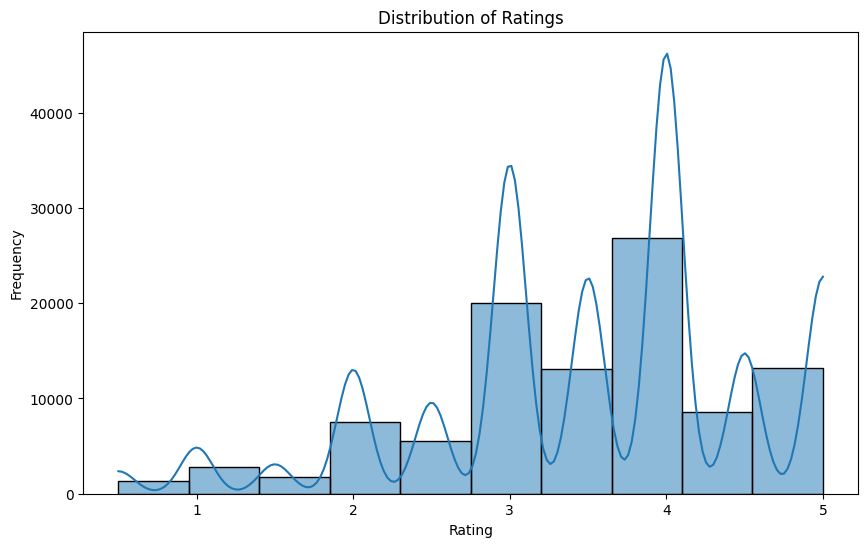

In [39]:
#Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [40]:
print(f"Mean global rating: {round(data['rating'].mean(),2)}.")

mean_ratings = data.groupby('userId_x')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean global rating: 3.84.
Mean rating per user: 3.88.


Which movies are most frequntly rated by users?

In [41]:
movie_ratings = data.merge(movies, on='movieId')
data['title'].value_counts()[0:10]

Pulp Fiction (1994)                                               55567
Fight Club (1999)                                                 11772
Star Wars: Episode IV - A New Hope (1977)                          6526
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)     4655
2001: A Space Odyssey (1968)                                       4469
Eternal Sunshine of the Spotless Mind (2004)                       4454
Inception (2010)                                                   3718
Big Lebowski, The (1998)                                           3392
Donnie Darko (2001)                                                3161
Forrest Gump (1994)                                                2961
Name: title, dtype: int64

highest rated film

In [42]:
mean_ratings = data.groupby('movieId')[['rating']].mean()
highest_rated = mean_ratings['rating'].idxmax()
data[data['movieId'] == highest_rated]

,movieId,imdbId,userId_x,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y,timestamp_rating,timestamp_tag
7605,53,110299,85,5.0,889468268.0,Lamerica (1994),Adventure|Drama,474,sci-fi,1.137206e+09,1998-03-09 21:31:08,2006-01-14 05:39:31
7606,53,110299,603,5.0,963180003.0,Lamerica (1994),Adventure|Drama,474,sci-fi,1.137206e+09,2000-07-10 01:00:03,2006-01-14 05:39:31


how many ratings does "Lamerica (1994)" have?

Lamerica may be the "highest" rated movie, but it only has 2 ratings. A better approach for evaluating movie popularity is to do look at the Bayesian average.

lowest rated film

In [43]:
lowest_rated = mean_ratings['rating'].idxmin()
data[data['movieId']==lowest_rated]

,movieId,imdbId,userId_x,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y,timestamp_rating,timestamp_tag
191101,3604,56048,89,0.5,1.520409e+09,Gypsy (1962),Musical,606,sci-fi,1.173213e+09,2018-03-07 10:48:00,2007-03-06 23:29:04


Gypsy (1962) is the lowest rated film...

Bayesian Average

In [45]:
movie_stats = data.groupby('movieId')['rating'].agg(['count', 'mean'])
movie_stats.head()

,count,mean
movieId,,
1,645,3.920930
2,440,3.431818
3,104,3.259615
4,7,2.357143
5,98,3.071429


In [46]:
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

print(f"Average number of ratings for a given movie: {C:.2f}")
print(f"Average rating for a given movie: {m:.2f}")

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return round(bayesian_avg, 3)

Average number of ratings for a given movie: 29.34
Average rating for a given movie: 3.26


bayesian average on "Lamerica (1994)"

In [47]:
lamerica = pd.Series([5, 5])
bayesian_avg(lamerica)

3.374

bayesian ave on all movies on "movieId" col

In [48]:
bayesian_avg_ratings = data.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')

In [49]:
movie_stats = movie_stats.merge(data[['movieId', 'title']])
movie_stats = movie_stats.drop_duplicates(subset=['movieId', 'title'])
movie_stats.sort_values('bayesian_avg', ascending=False).head()

,movieId,count,mean,bayesian_avg,title
84016,318,1268,4.429022,4.403,"Shawshank Redemption, The (1994)"
169022,2959,11772,4.272936,4.270,Fight Club (1999)
106285,750,970,4.268041,4.239,Dr. Strangelove or: How I Learned to Stop Worr...
15567,260,6526,4.231076,4.227,Star Wars: Episode IV - A New Hope (1977)
245181,48516,1070,4.252336,4.226,"Departed, The (2006)"


#edit this

Using the Bayesian average, we see that Shawshank Redemption, Fight Club (1999), Dr. Strangelove or: How I Learned to Stop Worr... are the most highly rated movies. This result makes much more sense since these movies are critically acclaimed films that have won medals
movie_stats = movie_stats.drop_duplicates(subset=['movieId', 'title'])
movie_stats.sort_values('bayesian_avg', ascending=True).head()
	movieId 	count 	mean 	bayesian_avg 	title

In [50]:
movie_stats = movie_stats.drop_duplicates(subset=['movieId', 'title'])
movie_stats.sort_values('bayesian_avg', ascending=True).head()

,movieId,count,mean,bayesian_avg,title
283014,136864,144,2.343750,2.499,Batman v Superman: Dawn of Justice (2016)
259911,69526,140,2.425000,2.570,Transformers: Revenge of the Fallen (2009)
147303,1882,33,1.954545,2.571,Godzilla (1998)
270482,87430,90,2.350000,2.575,Green Lantern (2011)
163408,2701,53,2.207547,2.584,Wild Wild West (1999)


With Bayesian averaging, it looks like Batman v Superman: Dawn of Justice (2016), and Godzilla (1998) are the worst-rated movies. Gypsy isn't so bad after all.

### WHAT IS GENRES SAYING?

In [51]:
# separate genres by removing the pipe

In [52]:
data['genres'] = data['genres'].apply(lambda x: x.split("|"))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
from collections import Counter

genre_frequency = Counter(g for genres in data['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 20 genres.


Counter({'Adventure': 60078,
         'Animation': 13869,
         'Children': 16214,
         'Comedy': 119183,
         'Fantasy': 22248,
         'Romance': 33661,
         'Drama': 167796,
         'Action': 86976,
         'Crime': 110715,
         'Thriller': 130839,
         'Horror': 14965,
         'Mystery': 27395,
         'Sci-Fi': 60471,
         'War': 13803,
         'Musical': 6315,
         'Documentary': 1492,
         'IMAX': 14535,
         'Western': 3526,
         'Film-Noir': 1066,
         '(no genres listed)': 49})

In [54]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Drama', 167796), ('Thriller', 130839), ('Comedy', 119183), ('Crime', 110715), ('Action', 86976)]


In [55]:
data.columns

Index(['movieId', 'imdbId', 'userId_x', 'rating', 'timestamp_x', 'title',
       'genres', 'userId_y', 'tag', 'timestamp_y', 'timestamp_rating',
       'timestamp_tag'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS(EDA)

### Univariate Analysis

#### NUMERICAL

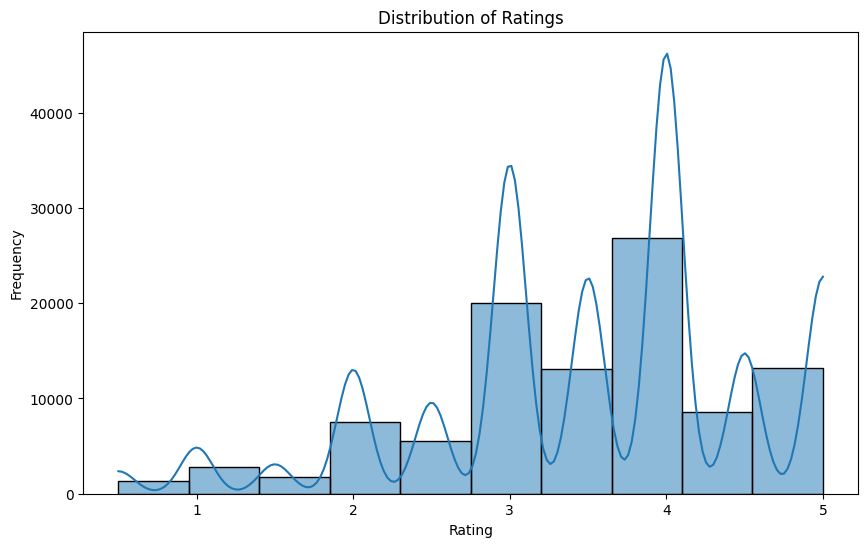

In [56]:
#Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


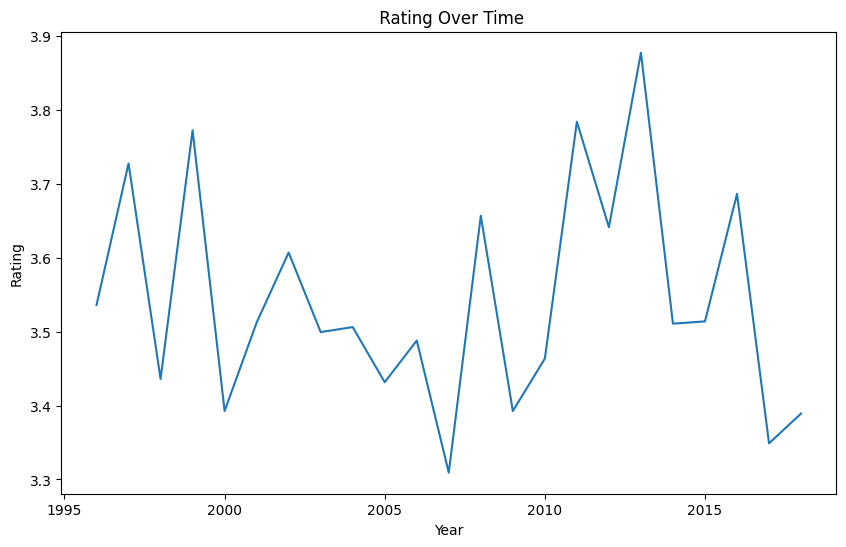

In [57]:
#Rating Over Time
ratings['year'] = pd.to_datetime(ratings['timestamp'], unit='s').dt.year
ratings_over_time = ratings.groupby('year')['rating'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=ratings_over_time.index, y=ratings_over_time.values)
plt.title(' Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

OBSERVATIONS

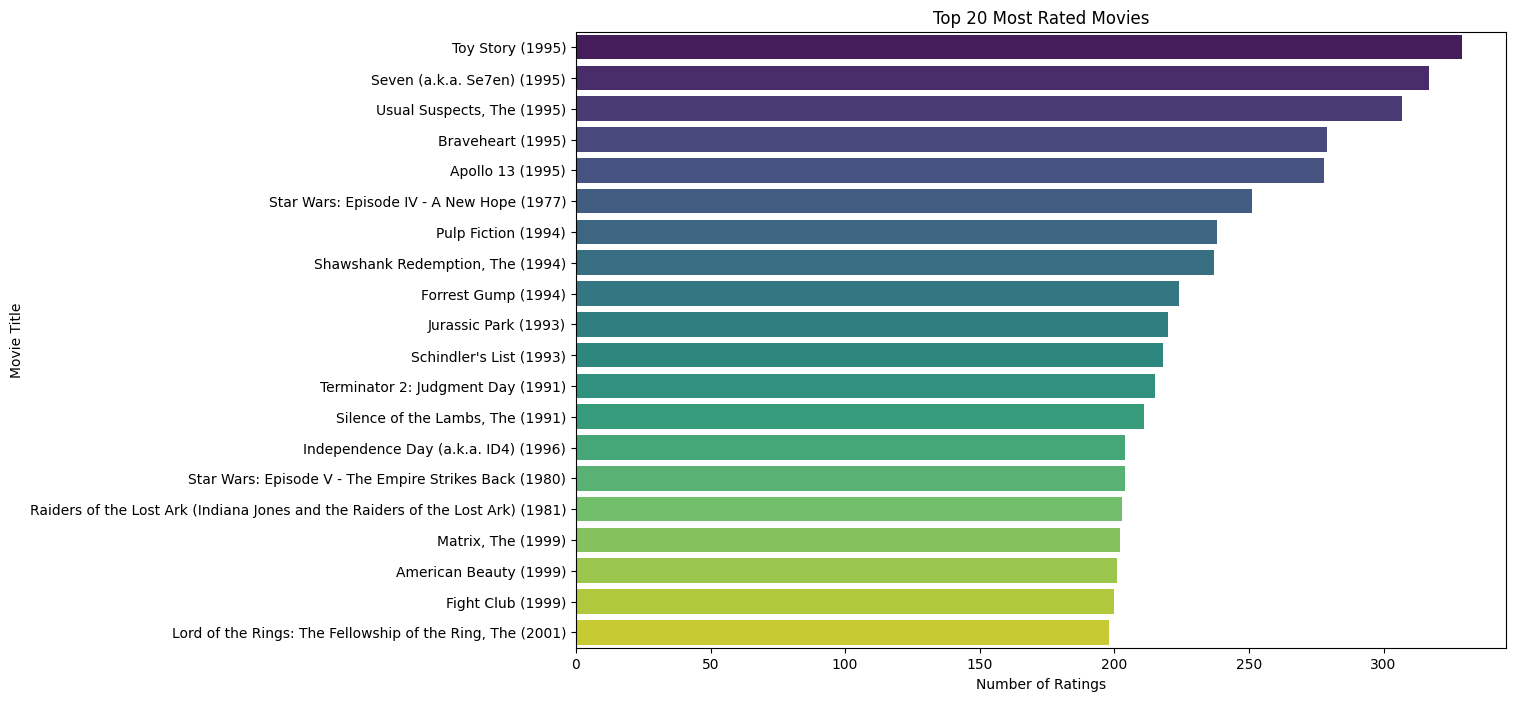

In [58]:
#Number of Ratings per Movie
ratings_per_movie = ratings.groupby('movieId').size().sort_values(ascending=False).head(20)
top_rated_movies = movies[movies['movieId'].isin(ratings_per_movie.index)]

plt.figure(figsize=(12, 8))
sns.barplot(x=ratings_per_movie.values, y=top_rated_movies['title'], palette='viridis')
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

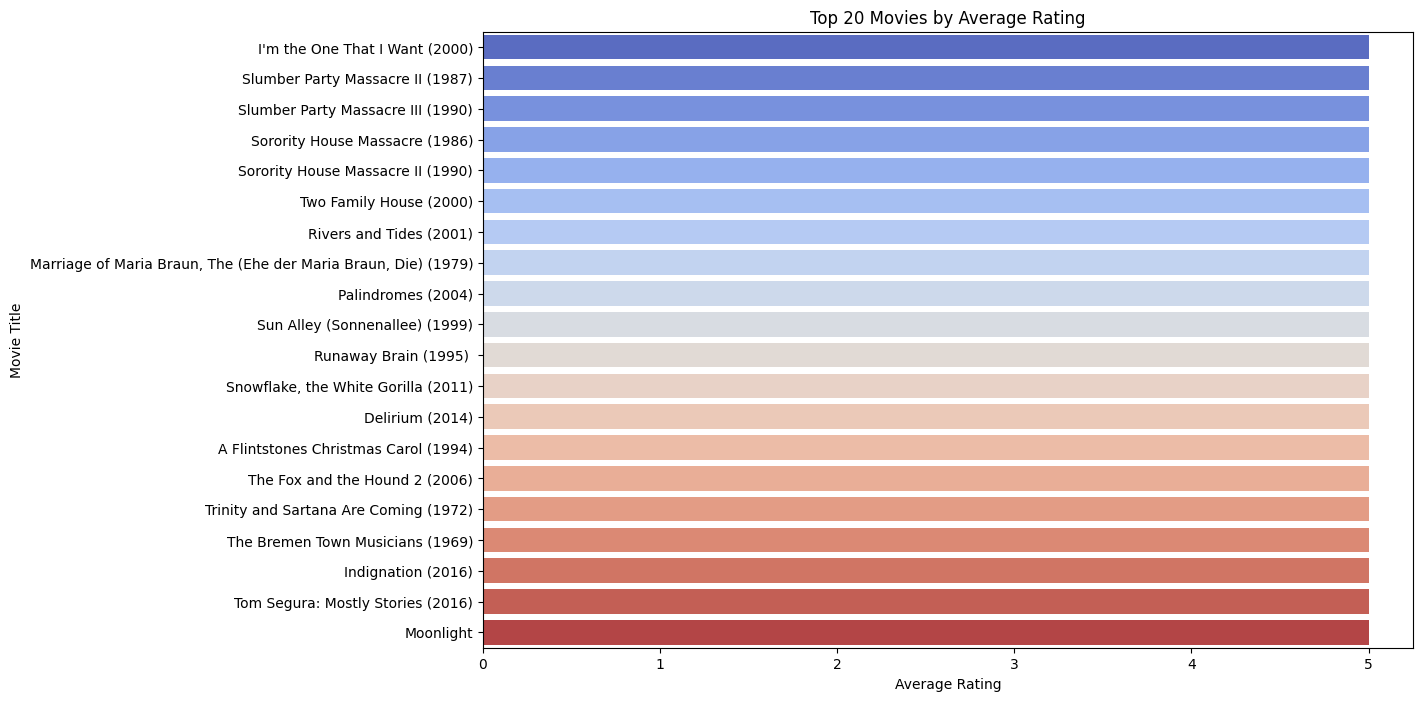

In [59]:
#Average ratings per movie
avg_rating_per_movie = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(20)
top_avg_rated_movies = movies[movies['movieId'].isin(avg_rating_per_movie.index)]

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_per_movie.values, y=top_avg_rated_movies['title'], palette='coolwarm')
plt.title('Top 20 Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

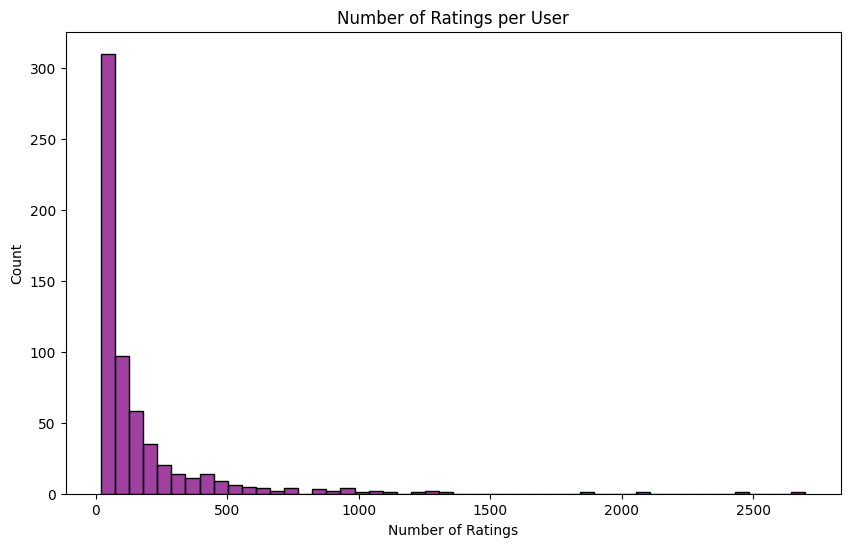

In [60]:
# Number of Ratings per User
ratings_per_user = ratings.groupby('userId')['rating'].count()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=False, color='purple')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

OBSERVATIONS

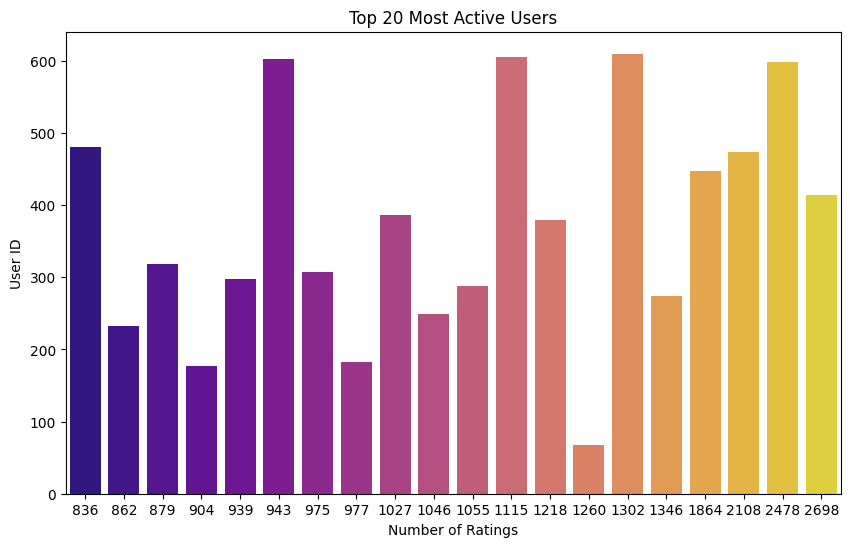

In [61]:
#Most Active users
top_users = ratings_per_user.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.values, y=top_users.index, palette='plasma')
plt.title('Top 20 Most Active Users')
plt.xlabel('Number of Ratings')
plt.ylabel('User ID')
plt.show()

#### CATEGORICAL

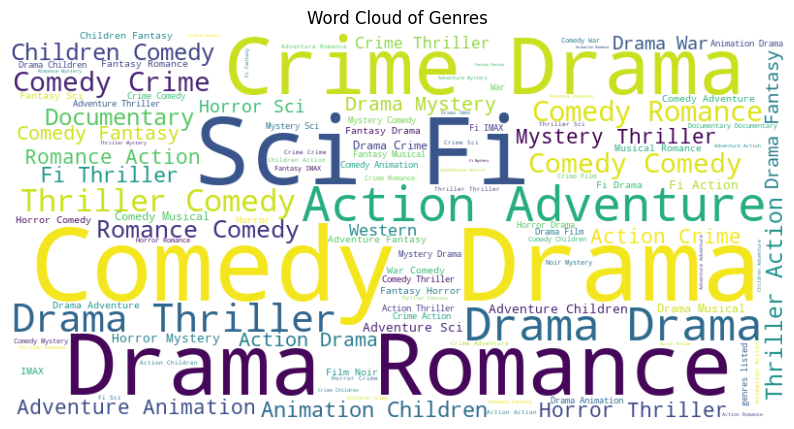

In [62]:
#WordCloud of genres
from wordcloud import WordCloud

all_genres = ' '.join(movies['genres'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()

OBSERVATIONS

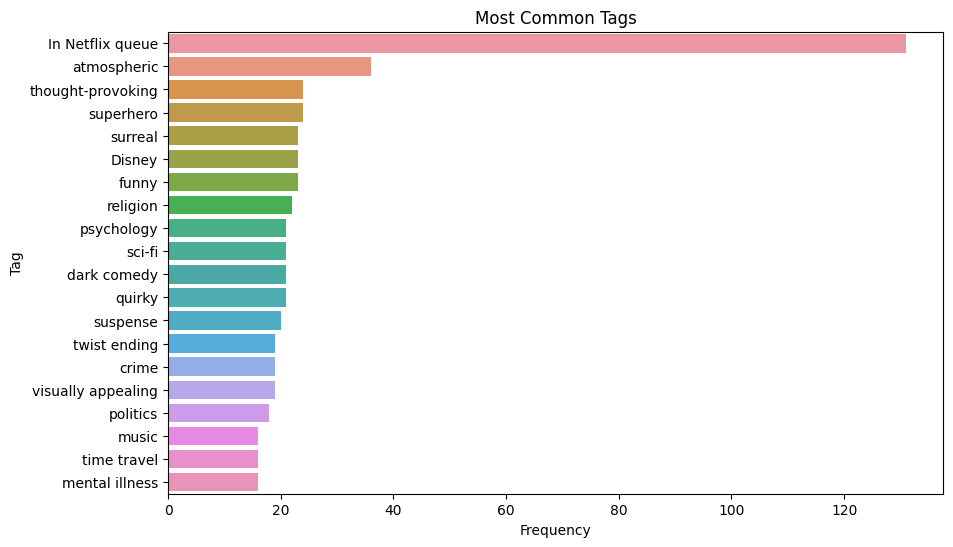

In [63]:
#Most common Tags
common_tags = tags['tag'].value_counts().head(20)  # Top 20 tags
plt.figure(figsize=(10, 6))
sns.barplot(x=common_tags.values, y=common_tags.index)
plt.title('Most Common Tags')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.show()

OBSERVATIONS

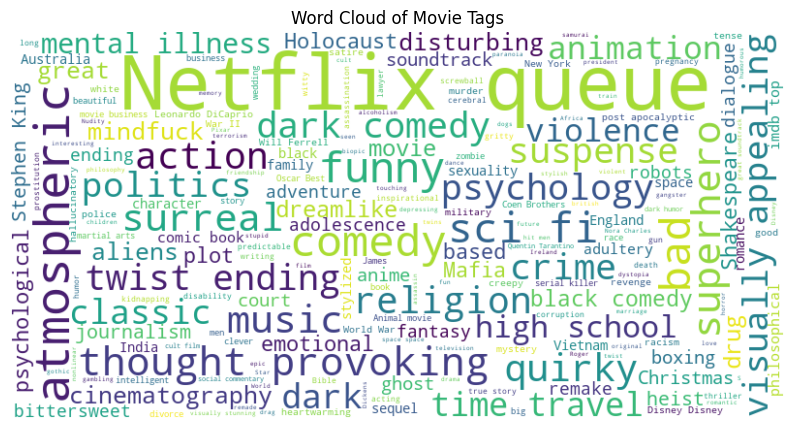

In [64]:
#World cloud of movie tags
from wordcloud import WordCloud

all_tags = ' '.join(tags['tag'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Tags')
plt.show()

OBSERVATIONS

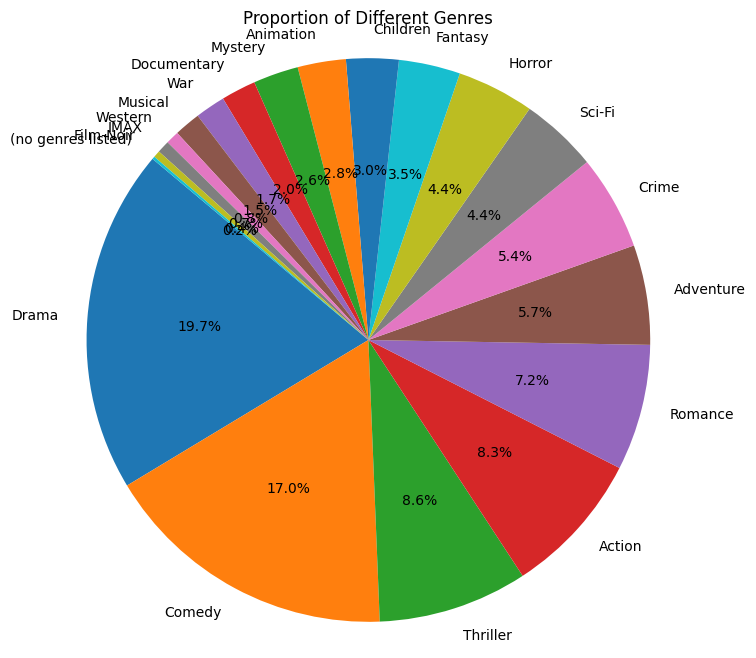

In [65]:
#Propotions of Different Genres
genre_counts = movies['genres'].str.split('|').explode().value_counts(15)

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Different Genres')
plt.axis('equal')
plt.show()

OBSERVATIONS

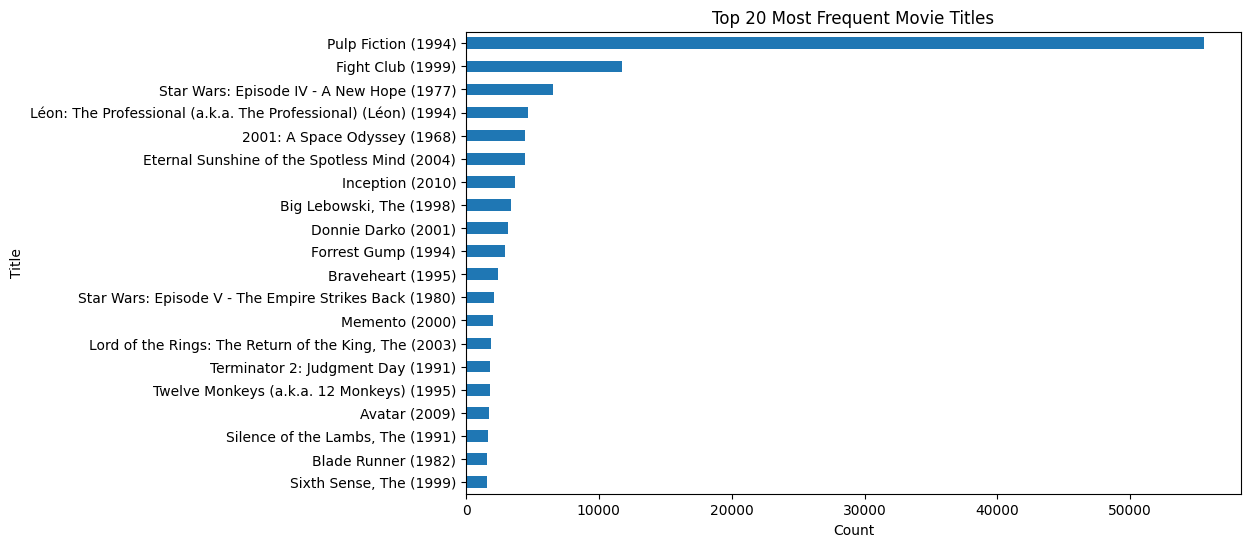

In [66]:

# Plotting the top 20 most frequent movie titles in descending order
plt.figure(figsize=(10, 6))
data['title'].value_counts().head(20).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Title')
plt.title('Top 20 Most Frequent Movie Titles')
plt.show()


OBSERVATIONS

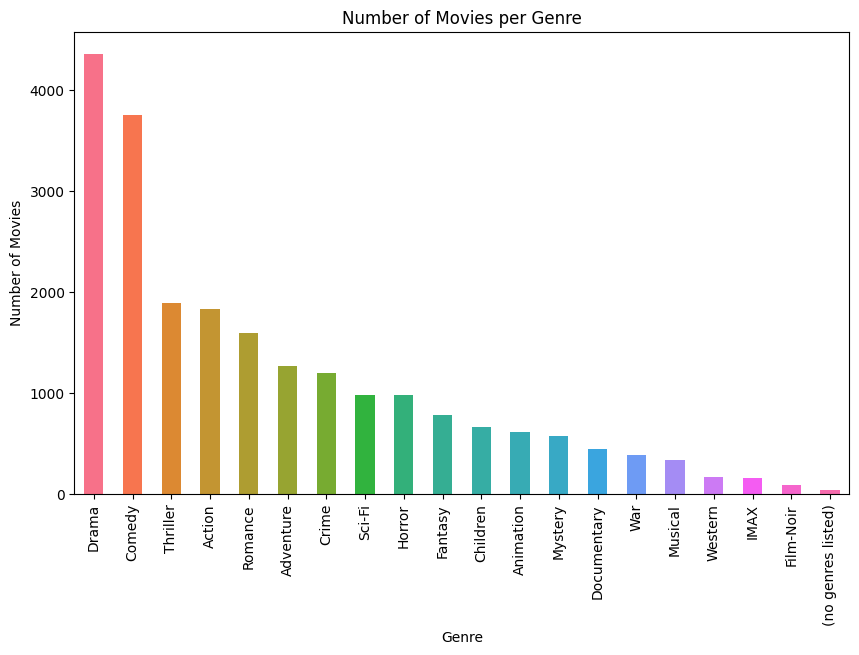

In [67]:
#Movies per genre
genres = movies['genres'].str.split('|').explode().value_counts()
palette = sns.color_palette("husl", len(genres))

plt.figure(figsize=(10, 6))
genres.plot(kind='bar', color=palette)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

OBSERVATIONS

## BIVARIATE ANALYSIS

####  Numerical-Numerical Relationships

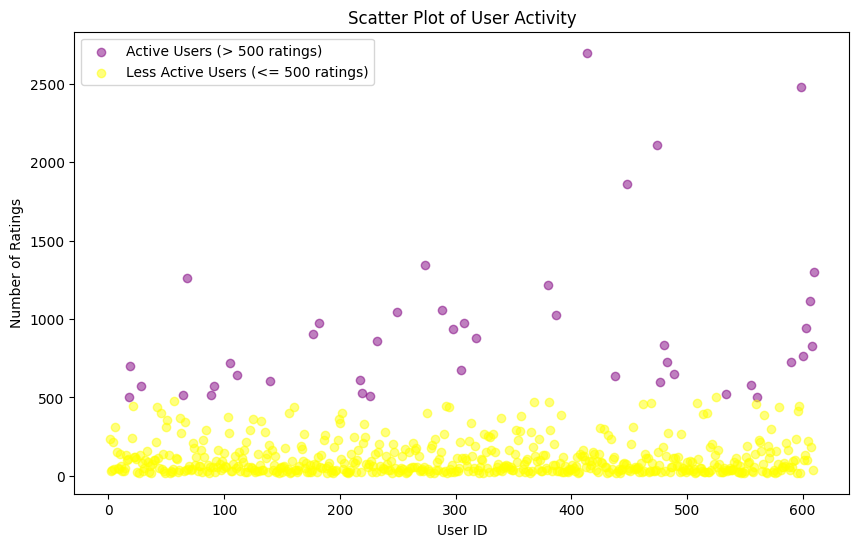

In [68]:
# Scatter plot of user activity

# Set a threshold for user activity differentiation
threshold_rating_count = 500  # For example, users with more than 500 ratings

# Separate users with high and low numbers of ratings
active_users = user_activity[user_activity['rating_count'] > threshold_rating_count]
less_active_users = user_activity[user_activity['rating_count'] <= threshold_rating_count]

plt.figure(figsize=(10, 6))
plt.scatter(active_users['userId'], active_users['rating_count'], alpha=0.5, color='purple', label='Active Users (> 500 ratings)')
plt.scatter(less_active_users['userId'], less_active_users['rating_count'], alpha=0.5, color='yellow', label='Less Active Users (<= 500 ratings)')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.title('Scatter Plot of User Activity')
plt.legend()
plt.show()


In [69]:

# Set a threshold for average rating differentiation
threshold_rating_mean = 3.5

# Separate movies with high and low average ratings
high_rating_movies = movie_stats[movie_stats['rating_mean'] >= threshold_rating_mean]
low_rating_movies = movie_stats[movie_stats['rating_mean'] < threshold_rating_mean]

# Scatter plot of number of ratings per movie vs. average rating with different colors
plt.figure(figsize=(10, 6))
plt.scatter(high_rating_movies['rating_count'], high_rating_movies['rating_mean'], alpha=0.5, color='green', label='High Average Rating')
plt.scatter(low_rating_movies['rating_count'], low_rating_movies['rating_mean'], alpha=0.5, color='orange', label='Low Average Rating')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Number of Ratings per Movie vs. Average Rating')
plt.legend()
plt.show()


KeyError: 'rating_mean'

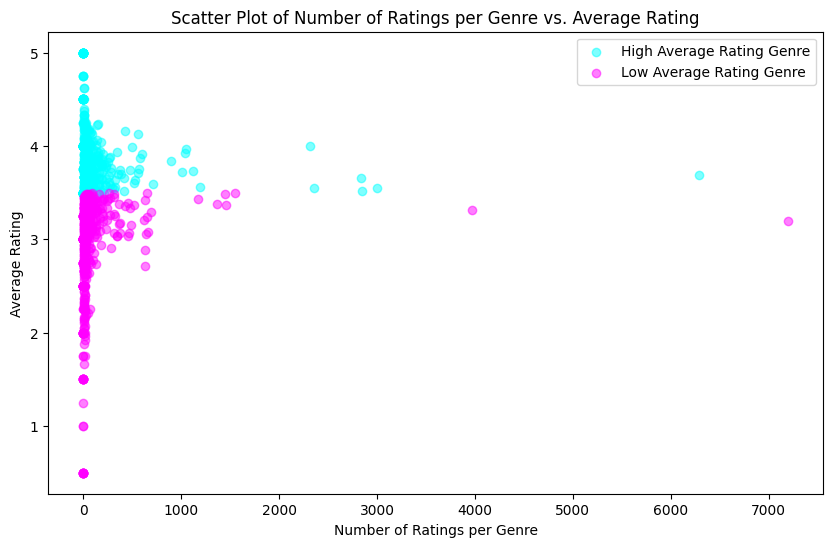

In [78]:
# Separate genres with high and low average ratings
high_rating_genres = genre_stats[genre_stats['rating_mean'] >= threshold_genre_rating_mean]
low_rating_genres = genre_stats[genre_stats['rating_mean'] < threshold_genre_rating_mean]

# Scatter plot of number of ratings per genre vs. average rating with different colors
plt.figure(figsize=(10, 6))
plt.scatter(high_rating_genres['rating_count'], high_rating_genres['rating_mean'], alpha=0.5, color='cyan', label='High Average Rating Genre')
plt.scatter(low_rating_genres['rating_count'], low_rating_genres['rating_mean'], alpha=0.5, color='magenta', label='Low Average Rating Genre')
plt.xlabel('Number of Ratings per Genre')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Number of Ratings per Genre vs. Average Rating')
plt.legend()
plt.show()

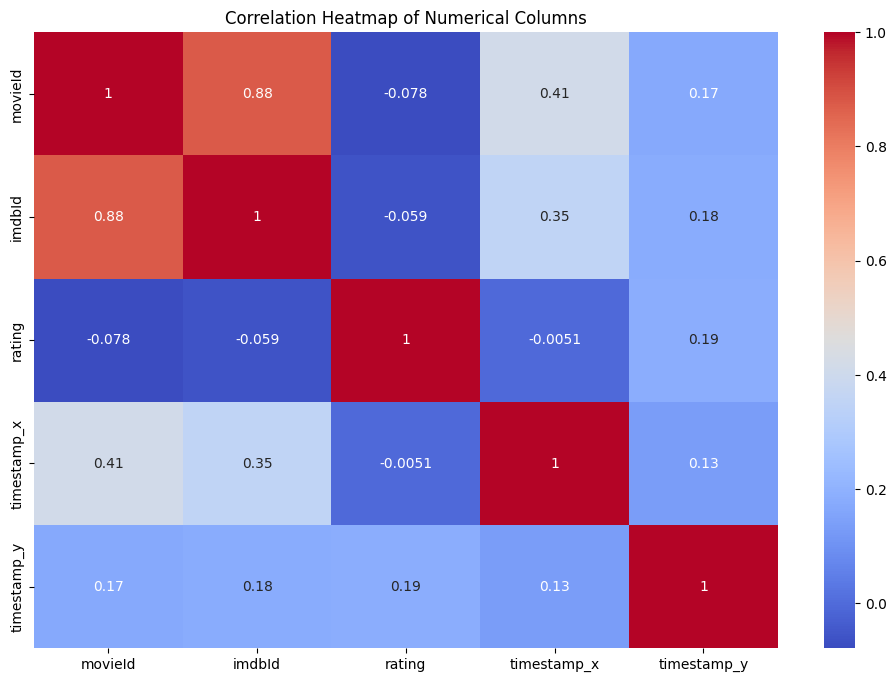

In [79]:
# Select numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Create correlation matrix
corr_matrix = data[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

OBSERVATIONS

# OUTLIER DETECTION

AttributeError: 'Axes' object has no attribute 'is_first_col'

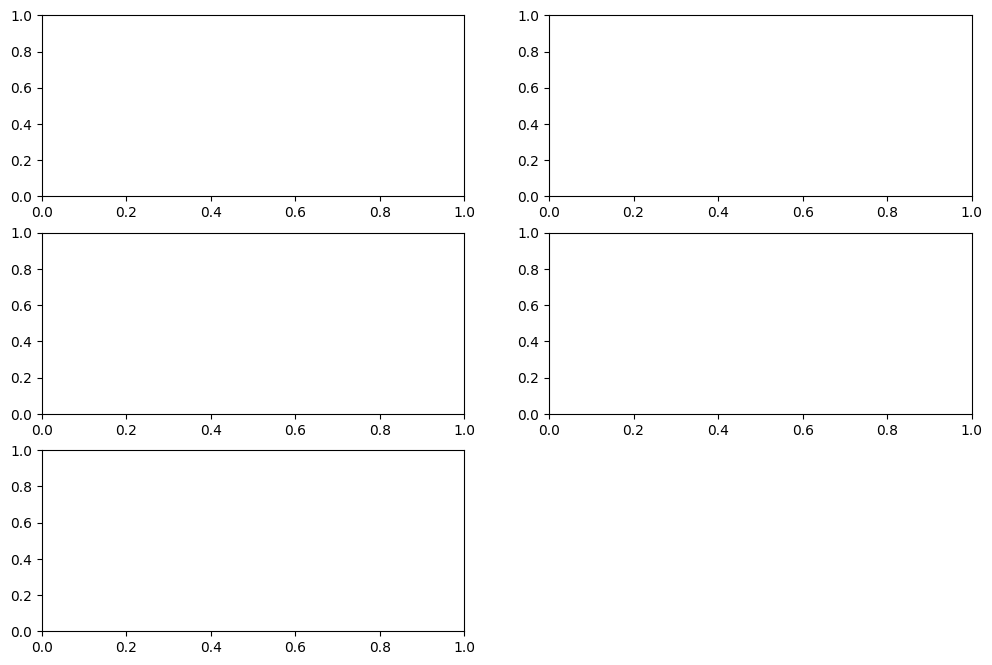

In [80]:
# Histograms for numerical features
data[[ 'movieId', 'imdbId', 'rating', 'timestamp_x', 'title', 'genres', 'tag',
       'timestamp_y']].hist(bins=30, figsize=(12, 8))
plt.show()


In [ ]:
# Create box plots for each numerical column
numerical_columns = ['movieId', 'imdbId', 'rating', 'timestamp_x', 'timestamp_y']

plt.figure(figsize=(8, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data[[column]])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

OBSERVATIONS
There is presence of outliers in movieId and imdbId however they are identifiers, and treating them as numerical values for outlier removal can lead to incorrect data processing.So we keep the outliers.

# DATA PREPROCESSING

#Data Encoding

In [81]:
# Check if 'genres' column exists in the DataFrame
if 'genres' in data.columns:
    # Convert genres to a list of genres
    data['genres'] = data['genres'].str.split('|')

    # Convert the list of genres into separate columns
    data = data.explode('genres')

    # One-hot encode genres
    data = pd.get_dummies(data, columns=['genres'], prefix='', prefix_sep='')
    print(data)
else:
    print("Error: 'genres' column not found in the DataFrame. It may have been overwritten.")

        movieId   imdbId  userId_x  rating   timestamp_x  \
0             1   114709         1     4.0  9.649827e+08   
1             1   114709         1     4.0  9.649827e+08   
2             1   114709         1     4.0  9.649827e+08   
3             1   114709         5     4.0  8.474350e+08   
4             1   114709         5     4.0  8.474350e+08   
...         ...      ...       ...     ...           ...   
285778   193581  5476944       184     4.0  1.537109e+09   
285779   193583  5914996       184     3.5  1.537110e+09   
285780   193585  6397426       184     3.5  1.537110e+09   
285781   193587  8391976       184     3.5  1.537110e+09   
285782   193609   101726       331     4.0  1.537158e+09   

                                            title  userId_y     tag  \
0                                Toy Story (1995)       336   pixar   
1                                Toy Story (1995)       474   pixar   
2                                Toy Story (1995)       567     fu

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

 #Your specific user IDs
userid_x = 1  # Replace with the actual user ID
userid_y = 2  # Replace with the actual user ID

# Include the specific user IDs in the dataset
additional_users = pd.DataFrame({'userId': [userid_x, userid_y], 'movieId': [0, 0], 'rating': [0, 0]})
data = pd.concat([data, additional_users], ignore_index=True)

# Encode userId and movieId
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

data['userId'] = user_encoder.fit_transform(data['userId'])
data['movieId'] = movie_encoder.fit_transform(data['movieId'])

# Encode the specific user IDs
encoded_userid_x = user_encoder.transform([userid_x])[0]
encoded_userid_y = user_encoder.transform([userid_y])[0]

# Standardisation


In [83]:
from sklearn.preprocessing import StandardScaler

# Normalize rating column (example)
scaler = StandardScaler()
data['rating'] = scaler.fit_transform(data[['rating']])
data

,movieId,imdbId,userId_x,rating,timestamp_x,title,userId_y,tag,timestamp_y,timestamp_rating,timestamp_tag,userId
0,1,114709.0,1.0,0.155521,9.649827e+08,Toy Story (1995),336.0,pixar,1.139046e+09,2000-07-30 21:45:03,2006-02-04 12:36:04,2
1,1,114709.0,1.0,0.155521,9.649827e+08,Toy Story (1995),474.0,pixar,1.137207e+09,2000-07-30 21:45:03,2006-01-14 05:47:05,2
2,1,114709.0,1.0,0.155521,9.649827e+08,Toy Story (1995),567.0,fun,1.525286e+09,2000-07-30 21:45:03,2018-05-02 21:33:33,2
3,1,114709.0,5.0,0.155521,8.474350e+08,Toy Story (1995),336.0,pixar,1.139046e+09,1996-11-08 09:36:02,2006-02-04 12:36:04,2
4,1,114709.0,5.0,0.155521,8.474350e+08,Toy Story (1995),474.0,pixar,1.137207e+09,1996-11-08 09:36:02,2006-01-14 05:47:05,2
...,...,...,...,...,...,...,...,...,...,...,...,...
285780,9740,6397426.0,184.0,-0.334288,1.537110e+09,Flint (2017),184.0,sci-fi,1.537099e+09,2018-09-16 17:56:45,2018-09-16 14:49:52,2
285781,9741,8391976.0,184.0,-0.334288,1.537110e+09,Bungo Stray Dogs: Dead Apple (2018),184.0,sci-fi,1.537099e+09,2018-09-16 18:00:21,2018-09-16 14:49:52,2
285782,9742,101726.0,331.0,0.155521,1.537158e+09,Andrew Dice Clay: Dice Rules (1991),184.0,sci-fi,1.537099e+09,2018-09-17 07:13:26,2018-09-16 14:49:52,2
285783,0,NaN,NaN,-3.762952,NaN,NaN,NaN,NaN,NaN,NaT,NaT,0


#Principal Component Analysis(PCA)

In [84]:

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Select numerical columns for PCA
numerical_columns = ['rating', 'timestamp_x', 'timestamp_y']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
principal_components = pca.fit_transform(data[numerical_columns])

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

# Make a copy of the original DataFrame to avoid modifying it in place
data_copy = data.copy()

# Reset index of both DataFrames to ensure there are no duplicate indices
data_copy.reset_index(drop=True, inplace=True)
pca_df.reset_index(drop=True, inplace=True)

# Concatenate the principal components with the copy of the original DataFrame
data_with_pca = pd.concat([data_copy, pca_df], axis=1)

# Display the new DataFrame with PCA components
data_with_pca.head()

,movieId,imdbId,userId_x,rating,timestamp_x,title,userId_y,tag,timestamp_y,timestamp_rating,timestamp_tag,userId,principal_component_1,principal_component_2
0,1,114709.0,1.0,0.155521,964982703.0,Toy Story (1995),336.0,pixar,1.139046e+09,2000-07-30 21:45:03,2006-02-04 12:36:04,2,2.878373e+08,1.640793e+08
1,1,114709.0,1.0,0.155521,964982703.0,Toy Story (1995),474.0,pixar,1.137207e+09,2000-07-30 21:45:03,2006-01-14 05:47:05,2,2.882008e+08,1.658819e+08
2,1,114709.0,1.0,0.155521,964982703.0,Toy Story (1995),567.0,fun,1.525286e+09,2000-07-30 21:45:03,2018-05-02 21:33:33,2,2.114887e+08,-2.145398e+08
3,1,114709.0,5.0,0.155521,847434962.0,Toy Story (1995),336.0,pixar,1.139046e+09,1996-11-08 09:36:02,2006-02-04 12:36:04,2,4.030656e+08,1.408434e+08
4,1,114709.0,5.0,0.155521,847434962.0,Toy Story (1995),474.0,pixar,1.137207e+09,1996-11-08 09:36:02,2006-01-14 05:47:05,2,4.034291e+08,1.426461e+08


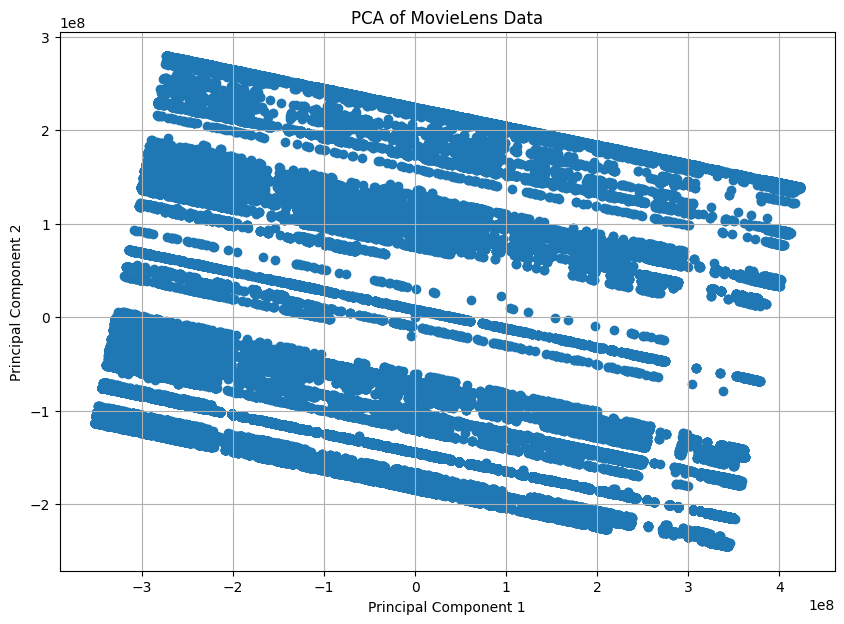

In [85]:
# Plot the PCA components
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['principal_component_1'], pca_df['principal_component_2'])
plt.title('PCA of MovieLens Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [86]:
# Prepare the data for the model
X = data[['userId', 'movieId']].values
y = data['rating'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Create the user-item interaction matrix
#user_item_matrix = data.pivot_table(index='userId_x', columns='movieId', values='rating')

# Fill missing values with 0
#user_item_matrix.fillna(0, inplace=True)

#user_item_matrix

### DATA SPARCITY

USER ITEM MATRIX

In [88]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['userId'].nunique()
    N = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
    
    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings)

In [89]:
X.shape

(610, 9724)

Our X matrix contains 610 users and 9724  movies.

Evaluating sparsity

Here, we calculate sparsity by dividing the number of stored elements by total number of elements. The number of stored (non-empty) elements in our matrix (nnz) is equivalent to the number of ratings in our dataset.

In [91]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 1.7%


check which users and movies have few interactions.

In [92]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

610

In [93]:
print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

Most active user rated 2698 movies.
Least active user rated 20 movies.


In [96]:
n_ratings_per_movie = X.getnnz(axis=0)
len(n_ratings_per_movie)

9724

In [97]:
print(f"Most rated movie has {n_ratings_per_movie.max()} ratings.")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings.")

Most rated movie has 329 ratings.
Least rated movie has 1 ratings.


C:\Users\DANIEL\AppData\Local\Temp\ipykernel_10172\3364525973.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_user, shade=True)
C:\Users\DANIEL\AppData\Local\Temp\ipykernel_10172\3364525973.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_movie, shade=True)


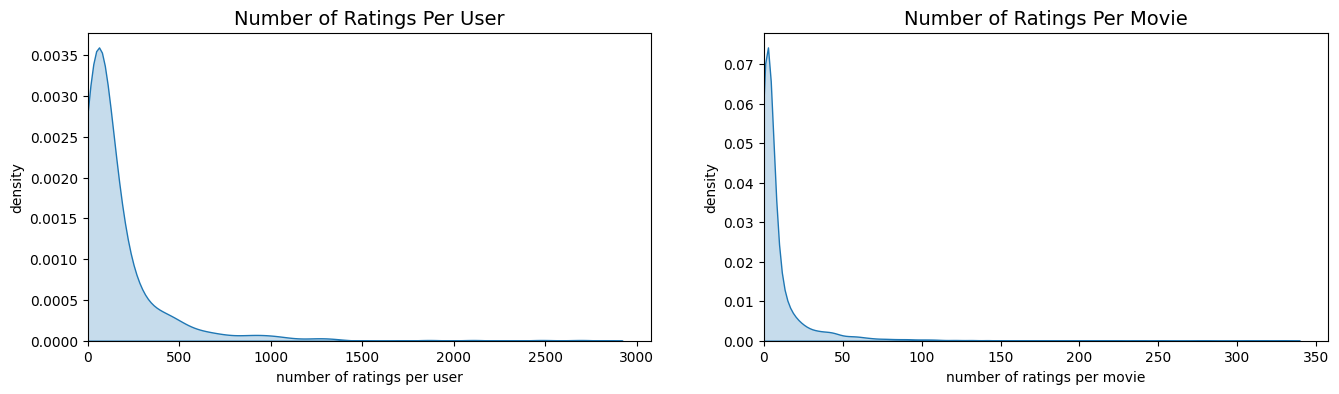

In [98]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

#MODELLING

## 1.Baseline model: recommend the most popular movies


In [99]:

from sklearn.metrics import mean_squared_error
from math import sqrt

# Baseline model: recommend the most popular movies
most_popular = ratings.groupby('movieId').size().sort_values(ascending=False).index[:5]

print("Most Popular Movies:")
for movie_id in most_popular:
    movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print(f"Movie ID: {movie_id}, Title: {movie_title}")

# Baseline RMSE (assuming using mean rating as prediction)
mean_rating = ratings['rating'].mean()
baseline_rmse = sqrt(mean_squared_error(ratings['rating'], np.full_like(ratings['rating'], mean_rating)))
print(f"Baseline RMSE: {baseline_rmse}")


Most Popular Movies:
Movie ID: 356, Title: Forrest Gump (1994)
Movie ID: 318, Title: Shawshank Redemption, The (1994)
Movie ID: 296, Title: Pulp Fiction (1994)
Movie ID: 593, Title: Silence of the Lambs, The (1991)
Movie ID: 2571, Title: Matrix, The (1999)
Baseline RMSE: 1.0425240696180562


## 2.Use KNNBasic for user-based collaborative filtering

In [100]:
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, KNNBasic
from surprise import accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split
from collections import defaultdict

# Load the data into Surprise format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split data into train and test sets
trainset, testset = surprise_train_test_split(data, test_size=0.25, random_state=42)

# Use KNNBasic for user-based collaborative filtering
algo_user_based = KNNBasic(sim_options={'user_based': True})
algo_user_based.fit(trainset)
predictions_user_based = algo_user_based.test(testset)

# Calculate RMSE
user_based_rmse = accuracy.rmse(predictions_user_based)

# Helper Functions for Precision and Recall at k
def precision_at_k(predictions, k=10, threshold=3.5):
    '''Return precision at k metric for each user and averaged over all users.'''
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # Number of relevant items in top k
        n_relevant = sum((true_r >= threshold) for (_, true_r) in user_ratings[:k])
        # Precision at k: relevant items / k
        precisions[uid] = n_relevant / k

    # Average precision at k over all users
    return sum(prec for prec in precisions.values()) / len(precisions)

def recall_at_k(predictions, k=10, threshold=3.5):
    '''Return recall at k metric for each user and averaged over all users.'''
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # Number of relevant items in top k
        n_relevant = sum((true_r >= threshold) for (_, true_r) in user_ratings[:k])
        # Number of relevant items in the whole set
        n_possible = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        # Recall at k: relevant items in top k / relevant items in the whole set
        recalls[uid] = n_relevant / n_possible if n_possible != 0 else 1

    # Average recall at k over all users
    return sum(rec for rec in recalls.values()) / len(recalls)

# Calculate other metrics (precision, recall, F1)
user_based_precision = precision_at_k(predictions_user_based, k=5, threshold=4)
user_based_recall = recall_at_k(predictions_user_based, k=5, threshold=4)
user_based_f1 = 2 * (user_based_precision * user_based_recall) / (user_based_precision + user_based_recall)

print(f"User-Based CF RMSE: {user_based_rmse}")
print(f"User-Based CF Precision: {user_based_precision}")
print(f"User-Based CF Recall: {user_based_recall}")
print(f"User-Based CF F1: {user_based_f1}")


ModuleNotFoundError: No module named 'surprise'

## 3.Use KNNBasic for item-based collaborative filtering


In [101]:
# Use KNNBasic for item-based collaborative filtering
algo_item_based = KNNBasic(sim_options={'user_based': False})
algo_item_based.fit(trainset)
predictions_item_based = algo_item_based.test(testset)

# Calculate RMSE
item_based_rmse = accuracy.rmse(predictions_item_based)

# Other metrics (precision, recall, F1)
item_based_precision = precision_at_k(predictions_item_based, k=5, threshold=4)
item_based_recall = recall_at_k(predictions_item_based, k=5, threshold=4)
item_based_f1 = 2 * (item_based_precision * item_based_recall) / (item_based_precision + item_based_recall)

print(f"Item-Based CF RMSE: {item_based_rmse}")
print(f"Item-Based CF Precision: {item_based_precision}")
print(f"Item-Based CF Recall: {item_based_recall}")
print(f"Item-Based CF F1: {item_based_f1}")


NameError: name 'KNNBasic' is not defined

## 4.Use SVD for matrix factorization


In [102]:
from surprise import SVD

# Use SVD for matrix factorization
algo_svd = SVD()
algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)

# Calculate RMSE
svd_rmse = accuracy.rmse(predictions_svd)

# Other metrics (precision, recall, F1)
svd_precision = precision_at_k(predictions_svd, k=5, threshold=4)
svd_recall = recall_at_k(predictions_svd, k=5, threshold=4)
svd_f1 = 2 * (svd_precision * svd_recall) / (svd_precision + svd_recall)

print(f"SVD RMSE: {svd_rmse}")
print(f"SVD Precision: {svd_precision}")
print(f"SVD Recall: {svd_recall}")
print(f"SVD F1: {svd_f1}")


ModuleNotFoundError: No module named 'surprise'

## 5.Hybrid Model

In [103]:
# Assume we have user-based and item-based CF predictions stored
user_based_predictions = algo_user_based.test(testset)
item_based_predictions = algo_item_based.test(testset)

# Combine the predictions (simple average)
hybrid_predictions = []
for ub_pred, ib_pred in zip(user_based_predictions, item_based_predictions):
    hybrid_est = (ub_pred.est + ib_pred.est) / 2
    hybrid_predictions.append(surprise.Prediction(ub_pred.uid, ub_pred.iid, ub_pred.r_ui, hybrid_est, ub_pred.details))

# Calculate RMSE
hybrid_rmse = accuracy.rmse(hybrid_predictions)

# Other metrics (precision, recall, F1)
hybrid_precision = precision_at_k(hybrid_predictions, k=5, threshold=4)
hybrid_recall = recall_at_k(hybrid_predictions, k=5, threshold=4)
hybrid_f1 = 2 * (hybrid_precision * hybrid_recall) / (hybrid_precision + hybrid_recall)

print(f"Hybrid Model RMSE: {hybrid_rmse}")
print(f"Hybrid Model Precision: {hybrid_precision}")
print(f"Hybrid Model Recall: {hybrid_recall}")
print(f"Hybrid Model F1: {hybrid_f1}")


NameError: name 'algo_user_based' is not defined

#MODEL EVALUATION

# RECOMMENDATIONS

In [104]:
# Hybrid Recommendations with Input Functions

def get_hybrid_recommendations(user_id, n=5):
    # User-based CF predictions
    user_based_predictions = algo_user_based.test([(user_id, movie_id, 0) for movie_id in movies['movieId'].unique()])

    # Item-based CF predictions
    item_based_predictions = algo_item_based.test([(user_id, movie_id, 0) for movie_id in movies['movieId'].unique()])

    # Combine predictions from both models
    hybrid_predictions = [(ub_pred.uid, ub_pred.iid, ub_pred.r_ui, (ub_pred.est + ib_pred.est) / 2, ub_pred.details)
                          for ub_pred, ib_pred in zip(user_based_predictions, item_based_predictions)]

    # Sort predictions by estimated rating in descending order
    hybrid_predictions.sort(key=lambda x: x[3], reverse=True)

    # Select top n recommendations
    top_recommendations = hybrid_predictions[:n]

    # Extract movie titles for recommendations
    recommendations = [movies[movies['movieId'] == pred[1]]['title'].values[0] for pred in top_recommendations]

    return recommendations

# Input function for user ID
def get_user_id():
    return int(input("Enter the user ID: "))

# Input function for number of recommendations
def get_num_recommendations():
    return int(input("Enter the number of recommendations: "))

# Get user ID and number of recommendations
user_id = get_user_id()
num_recommendations = get_num_recommendations()

# Generate hybrid recommendations
print("Hybrid Recommendations:")
print(get_hybrid_recommendations(user_id, num_recommendations))


Enter the user ID:  1
Enter the number of recommendations:  20


Hybrid Recommendations:


NameError: name 'algo_user_based' is not defined

### COLDSTART PROBLEM

In [121]:
n_movies = movies['movieId'].nunique()
print(f"There are {n_movies} unique movies in our movies dataset.")

There are 9742 unique movies in our movies dataset.


In [122]:
genres = set(g for G in movies['genres'] for g in G)

for g in genres:
    movies[g] = movies.genres.transform(lambda x: int(g in x))
    
movie_genres = movies.drop(columns=['movieId', 'title','genres'])

In [123]:
movie_genres.head()

,-,C,c,I,l,a,R,y,H,g,...,e,s,),o,v,,T,d,S,N
0,0,1,0,0,1,1,0,1,0,0,...,1,1,0,1,1,0,0,1,0,0
1,0,1,0,0,1,1,0,1,0,0,...,1,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,1,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,0,1,1,0,0,1,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [124]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(movie_genres, movie_genres)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (9742, 9742)


## ITEM ITEM RECOMMENDATION

In [105]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.
    
    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar movie ID's
    """
    X = X.T
    neighbour_ids = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

find_similar_movies() takes in a movieId and X matrix mapper, and outputs a list of movies that are similar to the movieId of interest.

In [106]:
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies

[3114, 480, 780, 260, 356, 364, 1210, 648, 1265]

find_similar_movies() returns a list of movieId's that are most similar to your movie of interest. 

converting movie id to titles for movie it to tilte for title title recommendations

In [108]:
movie_titles = dict(zip(movies['movieId'], movies['title']))

movie_id = 1

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='cosine', k=20)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995):
Toy Story 2 (1999)
Jurassic Park (1993)
Independence Day (a.k.a. ID4) (1996)
Star Wars: Episode IV - A New Hope (1977)
Forrest Gump (1994)
Lion King, The (1994)
Star Wars: Episode VI - Return of the Jedi (1983)
Mission: Impossible (1996)
Groundhog Day (1993)
Back to the Future (1985)
Shrek (2001)
Aladdin (1992)
Apollo 13 (1995)
Pulp Fiction (1994)
Star Wars: Episode V - The Empire Strikes Back (1980)
Willy Wonka & the Chocolate Factory (1971)
Men in Black (a.k.a. MIB) (1997)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Shawshank Redemption, The (1994)


this shows the 20 movies that are most similar to Toy Story (1995) movie. this only uses user ratings

In [110]:
#using eucledian metric
movie_id = 1

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='euclidean', k=20)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995):
Toy Story 2 (1999)
Mission: Impossible (1996)
Independence Day (a.k.a. ID4) (1996)
Bug's Life, A (1998)
Nutty Professor, The (1996)
Willy Wonka & the Chocolate Factory (1971)
Babe (1995)
Groundhog Day (1993)
Mask, The (1994)
Honey, I Shrunk the Kids (1989)
Monsters, Inc. (2001)
Men in Black (a.k.a. MIB) (1997)
Indiana Jones and the Temple of Doom (1984)
Twister (1996)
Austin Powers: International Man of Mystery (1997)
Mrs. Doubtfire (1993)
Beauty and the Beast (1991)
Beetlejuice (1988)
Lion King, The (1994)


### MOVIE FINDER FROM KNEAREST ITEM ITEM RECOMMENDER

In [111]:
from fuzzywuzzy import process

#for similarity incase of spelling or ommisions to give most similar title
def movie_finder(title):
    all_titles = movies['title'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

In [115]:
title = movie_finder('ForRet Gmp')
title

'Forrest Gump (1994)'

FUZZY WUZZY WORKS

movie index mapper which maps a movie title to the index that it represents in our matrix.

In [118]:
movie_idx = dict(zip(movies['title'], list(movies.index)))
idx = movie_idx[title]
print(f"Movie index for 'Forrest Gump (1994)': {idx}")

Movie index for 'Forrest Gump (1994)': 314


Using this handy movie_idx dictionary, we know that Jumanji is represented by index 1 in our matrix. Let's get the top 10 most similar movies to Jumanji.

In [125]:
n_recommendations=10
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendations+1)]
similar_movies = [i[0] for i in sim_scores]

print(f"Because you watched {title}:")
movies['title'].iloc[similar_movies]

Because you watched Forrest Gump (1994):


1730           Life Is Beautiful (La Vita è bella) (1997)
2262                  Train of Life (Train de vie) (1998)
6296    Tiger and the Snow, The (La tigre e la neve) (...
6624    I Served the King of England (Obsluhoval jsem ...
3                                Waiting to Exhale (1995)
10                         American President, The (1995)
47                                Mighty Aphrodite (1995)
52                      Postman, The (Postino, Il) (1994)
83                                 Beautiful Girls (1996)
165                        Something to Talk About (1995)
Name: title, dtype: object

In [126]:
print(f"Because you watched {title}:")
movies['title'].iloc[similar_movies]

Because you watched Forrest Gump (1994):


1730           Life Is Beautiful (La Vita è bella) (1997)
2262                  Train of Life (Train de vie) (1998)
6296    Tiger and the Snow, The (La tigre e la neve) (...
6624    I Served the King of England (Obsluhoval jsem ...
3                                Waiting to Exhale (1995)
10                         American President, The (1995)
47                                Mighty Aphrodite (1995)
52                      Postman, The (Postino, Il) (1994)
83                                 Beautiful Girls (1996)
165                        Something to Talk About (1995)
Name: title, dtype: object

these recommendationms are similar to forest gump

to get recommendations for other films

In [129]:
def get_content_based_recommendations(title_string, n_recommendations=10):
    title = movie_finder(title_string)
    idx = movie_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_movies = [i[0] for i in sim_scores]
    print(f"Because you watched {title}:")
    print(movies['title'].iloc[similar_movies])

In [131]:
get_content_based_recommendations('No Game No Life: Zero (2017)', 15)

Because you watched No Game No Life: Zero (2017):
4558    Triplets of Belleville, The (Les triplettes de...
4841                                    Cool World (1992)
7199                Mickey's Once Upon a Christmas (1999)
7368                   South Park: Imaginationland (2008)
8725                           Daddy, I'm A Zombie (2012)
8999                                     Anomalisa (2015)
9665                            Porky in Wackyland (1938)
9738                         No Game No Life: Zero (2017)
2044                                   Mystery Men (1999)
8216                                      R.I.P.D. (2013)
9737            Black Butler: Book of the Atlantic (2017)
325                                      Mask, The (1994)
870                                   Lesson Faust (1994)
4513                                Medallion, The (2003)
5842    Pom Poko (a.k.a. Raccoon War, The) (Heisei tan...
Name: title, dtype: object


#### DIMENSIONALITY REDUCTION

In [132]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20, n_iter=10)
Q = svd.fit_transform(X.T)
Q.shape

movie_id = 1
similar_movies = find_similar_movies(movie_id, Q.T, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995):
Home Alone (1990)
Jurassic Park (1993)
Aladdin (1992)
Back to the Future (1985)
Willy Wonka & the Chocolate Factory (1971)
Forrest Gump (1994)
Groundhog Day (1993)
Star Wars: Episode IV - A New Hope (1977)
Princess Bride, The (1987)


The results above are the most similar movies to Toy Story using kNN on our “compressed” movie-factor matrix. We reduced the dimensions down to n_components=20. We can think of each component representing a latent feature such as movie genre.

# CONCLUSIONS

# REFERENCES